In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [242]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [243]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.close()

In [9]:
df.shape

(27, 2)

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test= train_test_split(df[['age']], df.bought_insurance, train_size=0.9)

In [13]:
X_test

,age
2,47
11,28
6,55


In [315]:
X_train;

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model.predict(X_test)

array([1, 0, 1])

In [19]:
model.score(X_test, y_test)

0.6666666666666666

In [20]:
model.predict_proba(X_test) #first column- probability they don't buy, second column- probability they buy

array([[0.14972749, 0.85027251],
       [0.79990888, 0.20009112],
       [0.04515439, 0.95484561]])

In [24]:
model.predict([[56]])

array([1])

In [25]:
model.predict([[25]])

array([0])

## HR Analytics LogReg Analysis

<ol>
<li> <b><i>Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)</i></b>
</ol>

In [244]:
df = pd.read_csv('HR_comma_sep.csv'); print(df.head()); df.shape

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

(14999, 10)

In [263]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


It seems like people are staying/leaving based on satisfaction level, promotion_last_5years, monthly hours, and work_accident. 

### Does Average Monthly Hours Affect Employees Leave?

Text(0, 0.5, 'Left?')

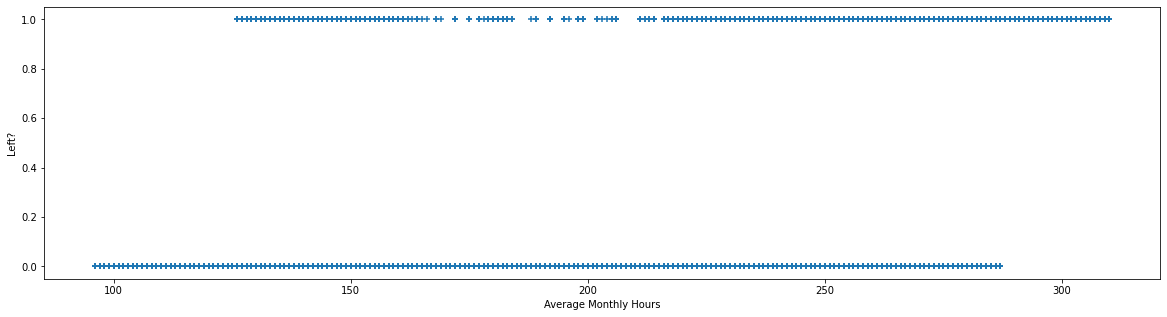

In [292]:
fig,ax = plt.subplots(figsize=(20,5))
ax.scatter(df.average_montly_hours, df.left, marker='+')
ax.set_xlabel('Average Monthly Hours')
ax.set_ylabel('Left?')

### Does Department Affect Employee Leave?

In [305]:
import numpy as np
department = np.sort(df.Department.unique())

In [66]:
df_zero = df[df['left'] == 0] #dataframe where none of the employees leave (left=0)
df_zero.groupby('Department')['left'].count() #count how many did not leave by Department 

Department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: left, dtype: int64

In [65]:
df_one = df[df['left'] == 1] #dataframe where the employees leave (left=1)
df_one.groupby('Department')['left'].count() #count how many did not leave by Department 

Department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64

<b><i>2. Plot bar charts showing corelation between department and employee retention</i><b>

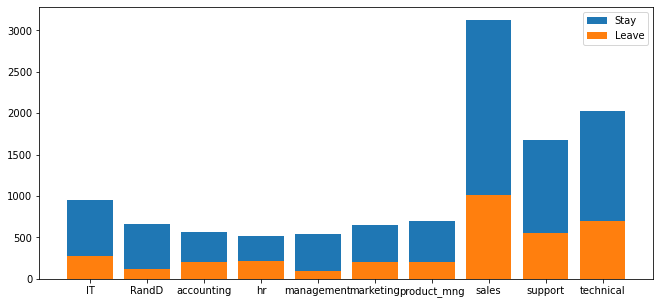

In [306]:
ax = plt.figure(figsize=(11,5))

p0 = plt.bar(department, df_zero.groupby('Department')['left'].count()) #Stay
p1 = plt.bar(department, df_one.groupby('Department')['left'].count()) #Leave
plt.legend((p0[0], p1[0]), ('Stay', 'Leave'))

There seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

In [310]:
##Leave

percentage_leave = df_zero.groupby('Department')['left'].count()/ \
(df_zero.groupby('Department')['left'].count() + df_one.groupby('Department')['left'].count()); percentage_leave

Department
IT             0.777506
RandD          0.846252
accounting     0.734029
hr             0.709066
management     0.855556
marketing      0.763403
product_mng    0.780488
sales          0.755072
support        0.751009
technical      0.743750
Name: left, dtype: float64

In [309]:
##Stay 

percentage_stay = df_one.groupby('Department')['left'].count()/ \
(df_zero.groupby('Department')['left'].count() + df_one.groupby('Department')['left'].count())

### Does Satisfaction Level have Direct Impact on Employee Leave?

Text(0, 0.5, 'Left')

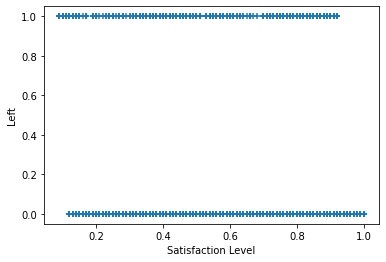

In [77]:
f, ax = plt.subplots(1, 1, sharey=True)
ax.scatter(df.satisfaction_level, df.left, marker='+')
ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Left')


### Does Promotion Affect Employee Leaving?

In [83]:
#df_zero_pr = df[df['promotion_last_5years']==0]
df_zero.groupby('promotion_last_5years')['left'].count() #count how many left when not promoted/promoted

promotion_last_5years
0    11128
1      300
Name: left, dtype: int64

Thus 11128 did not get promoted, and still stayed (promoted = 0, left= 0). Only 300 got promoted, and  stayed.

In [84]:
df_one.groupby('promotion_last_5years')['left'].count() #count how many stayed when not promoted/promoted

promotion_last_5years
0    3552
1      19
Name: left, dtype: int64

Thus 3552 did not get promoted, and left. Only 19 did get promoted, and left.

In [130]:
for i in range(len(df.promotion_last_5years.unique())):
    print(i)

0
1


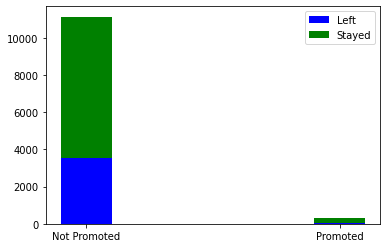

In [198]:
fig, ax = plt.subplots()

p0 = ax.bar(df.promotion_last_5years.unique(), df_zero.groupby('promotion_last_5years')['left'].count(), color='g', width=0.2)
#bar plot based on whether they stayed 
ax.legend((p1, p0), ('Left', 'Stayed'))
plt.xticks(range(len(df.promotion_last_5years.unique())), ('Not Promoted','Promoted'))
p1 = ax.bar(df.promotion_last_5years.unique(), df_one.groupby('promotion_last_5years')['left'].count(), color= 'b', width=0.2)
#bar plot based on whether they left

Yes, it does!

### Does Salary Affect Employee Leaving?

In [87]:
df_salary = df[['salary', 'left']]; df_salary.head()

,salary,left
0,low,1
1,medium,1
2,medium,1
3,low,1
4,low,1


In [90]:
df_salary_zero = df_salary[df_salary['left'] == 0] #Employees Stay
df_salary_zero.groupby('salary')['left'].count()

salary
high      1155
low       5144
medium    5129
Name: left, dtype: int64

Thus, 1155 employees had high salary and stay

In [91]:
df_salary_one = df_salary[df_salary['left'] == 1] #Employees Stay
df_salary_one.groupby('salary')['left'].count()

salary
high        82
low       2172
medium    1317
Name: left, dtype: int64

Thus, only 82 employees had high salary and left. 

<i><b>3. Plot bar charts showing impact of employee salaries on retention</b></i>


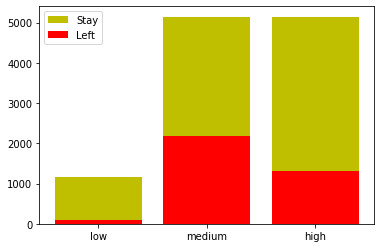

In [179]:
x2 = df_salary_zero.groupby('salary')['left'].count() #Employees Stay-YELLOW
p0 = plt.bar(df.salary.unique(), x2, color='y')

x1 = df_salary_one.groupby('salary')['left'].count() #Employees Left-RED
p1 = plt.bar(df.salary.unique(), x1, color='r')

plt.legend((p0[0], p1[0]), ['Stay', 'Left'])

Yes, it does!

## From the data analysis so far we can conclude that we will use following variables as independant variables in our model
<ol>
    <li> Salary </li>
    <li> Promotion </li>
    <li> Average Monthly Hours </li>
    <li> Satisfaction Level </li>

<b><i> 4. Now build logistic regression model using variables that were narrowed down in step 1 </i></b>

In [ ]:
subdf = df[['salary', 'promotion_last_5years', 'average_montly_hours', 'satisfaction_level']]

In [314]:
subdf

,salary,promotion_last_5years,average_montly_hours,satisfaction_level
0,low,0,157,0.38
1,medium,0,262,0.80
2,medium,0,272,0.11
3,low,0,223,0.72
4,low,0,159,0.37
...,...,...,...,...
14994,low,0,151,0.40
14995,low,0,160,0.37
14996,low,0,143,0.37
14997,low,0,280,0.11


## Do OneHotEncoder for Salary

In [327]:
dummies = pd.get_dummies(subdf.salary) #generate 3 columns for low, medium, high salary

In [328]:
merged = pd.concat([subdf, dummies], axis='columns'); merged 

,salary,promotion_last_5years,average_montly_hours,satisfaction_level,high,low,medium
0,low,0,157,0.38,0,1,0
1,medium,0,262,0.80,0,0,1
2,medium,0,272,0.11,0,0,1
3,low,0,223,0.72,0,1,0
4,low,0,159,0.37,0,1,0
...,...,...,...,...,...,...,...
14994,low,0,151,0.40,0,1,0
14995,low,0,160,0.37,0,1,0
14996,low,0,143,0.37,0,1,0
14997,low,0,280,0.11,0,1,0


But think-- We can drop the 'salary' column now!

In [322]:
merged.drop('salary', axis=1) #but we must drop one of the dummy variable columns to avoid multicollinearity-dummy variable trap

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,0,1,0


In [331]:
final = merged.drop(['salary', 'low'], axis=1);final.head()

,promotion_last_5years,average_montly_hours,satisfaction_level,high,medium
0,0,157,0.38,0,0
1,0,262,0.80,0,1
2,0,272,0.11,0,1
3,0,223,0.72,0,0
4,0,159,0.37,0,0


In [332]:
from sklearn.model_selection import train_test_split

X = final
y = df.left

In [336]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3)

In [337]:
model = LogisticRegression()

In [338]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [339]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

<i> <b>5. Accuracy of the model</b> </i>

In [342]:
model.score(X_test, y_test)

0.778952380952381